In [146]:
#This code  Done By:
#           Ezzaddin Ahmed Othman Saeed
#                 Taiz-Yemen
#------------------------------------------------

from sklearn.externals.joblib import Memory

 #    STEP 1:
    
     # Load the experiment data.
from sklearn.datasets import load_svmlight_file

mem = Memory("./mycache")

mem.cache
def get_data():
    data = load_svmlight_file("./datasets/australian_scale")
    
    return data

X, y = get_data()
X = X.toarray()

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [148]:
import numpy
n_samples_train,n_featues_train = X_train.shape


def svm(X_train,y_train,W):
    g = numpy.ones([n_featues_train,1])
    for i in range(n_samples_train):
        X = X_train[i].reshape(1,n_featues_train)
        y = y_train[i].reshape(1,1)
        h = 1-numpy.multiply(y,numpy.dot(X,W))
        if(h >= 0):
            g += W-numpy.dot(X.T,y)
        else:
            g += W
    
    W = W - lr * g / n_samples_train
    return W


In [149]:
def svm_loss(X_train,y_train,f,W):
    n_samples_train,n_featues_train = X_train.shape
    loss = 0
    for i in range(n_samples_train):
        X =X_train[i]
        y =y_train[i]
        h = 1-numpy.multiply(y,numpy.dot(W.T,X))
        if(h >= 0):
            loss += f*h
    return loss/n_samples_train+numpy.dot(W.T,W)/2

In [150]:
f = 0.9 
#learning rate
lr = 0.01  
losses_train = [] 
losses_val = [] 
total_loop = 100 
n_samples_train,n_featues_train = X_train.shape
W = numpy.ones((n_featues_train,1))

for i in range(total_loop):
    
    W=svm(X_train,y_train,W)
    loss=svm_loss(X_train,y_train,f,W)
    losses_train.append(loss[0][0])
    loss=svm_loss(X_val,y_val,f,W)
    losses_val.append(loss[0][0])
    

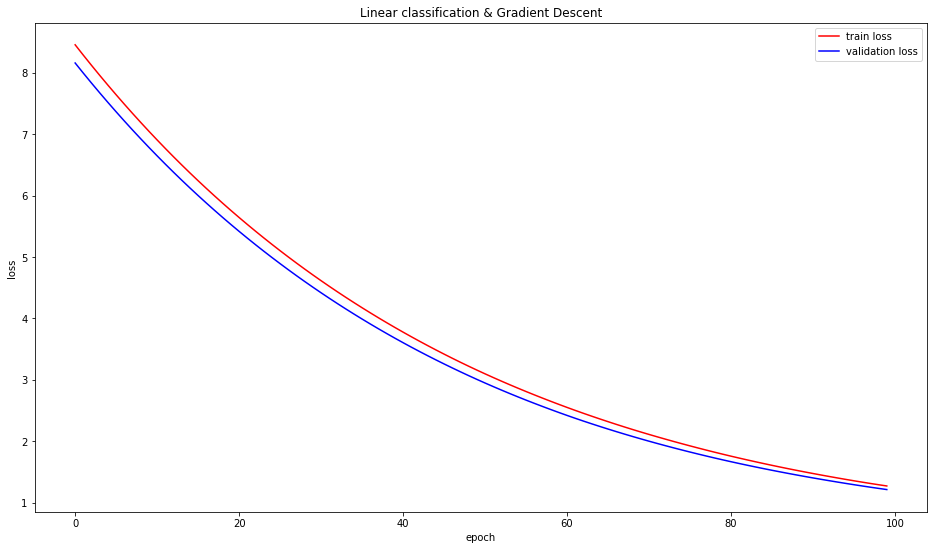

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,9))
plt.plot(losses_train,color="r",label="train loss")
plt.plot(losses_val,color="b",label="validation loss")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Linear classification & Gradient Descent")
plt.show()